# Playing around with Pittsburgh 311 Data


This notebook is going to play around with the [311 Data](https://data.wprdc.org/dataset/311-data) from the [Western Pennsylvania Regional Data Center](http://www.wprdc.org/)


I have taken the liberty of downloading the 311 data 


In [55]:
# use the %ls magic to list the files in the current directory.
%ls

data/                  pgh-311.ipynb
images/                what-is-jupyter.ipynb


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline

In [2]:
three11s = pd.read_csv("data/pgh-311.csv", parse_dates=['CREATED_ON'])

In [4]:
three11s.dtypes

_id                               int64
REQUEST_ID                        int64
CREATED_ON               datetime64[ns]
REQUEST_TYPE                     object
REQUEST_ORIGIN                   object
DEPARTMENT                       object
NEIGHBORHOOD                     object
COUNCIL_DISTRICT                float64
WARD                            float64
TRACT                           float64
PUBLIC_WORKS_DIVISION           float64
PLI_DIVISION                    float64
POLICE_ZONE                     float64
dtype: object

In [14]:
three11s.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE
0,1,3762,2015-05-06 15:16:00,Potholes,Call Center,DPW - Street Maintenance,Lincoln-Lemington-Belmar,9,12,42003120300,2,12,5
1,2,3763,2015-05-06 15:21:00,Potholes,Call Center,DPW - Street Maintenance,Carrick,4,32,42003290400,4,32,3
2,57402,63038,2016-04-19 08:01:00,Vacant Building,Control Panel,"Permits, Licenses and Inspections",Knoxville,3,30,42003300100,4,30,3
3,4,3765,2015-05-06 15:33:00,Public Works Department,Call Center,DPW - Administration,Greenfield,5,15,42003151600,3,15,4
4,6,3767,2015-05-06 15:38:00,Potholes,Call Center,DPW - Street Maintenance,Squirrel Hill North,8,14,42003140200,3,14,4


In [16]:
three11s.loc[0]

_id                                             1
REQUEST_ID                                   3762
CREATED_ON                    2015-05-06 15:16:00
REQUEST_TYPE                             Potholes
REQUEST_ORIGIN                        Call Center
DEPARTMENT               DPW - Street Maintenance
NEIGHBORHOOD             Lincoln-Lemington-Belmar
COUNCIL_DISTRICT                                9
WARD                                           12
TRACT                                 4.20031e+10
PUBLIC_WORKS_DIVISION                           2
PLI_DIVISION                                   12
POLICE_ZONE                                     5
Name: 0, dtype: object

## Embedded Plots

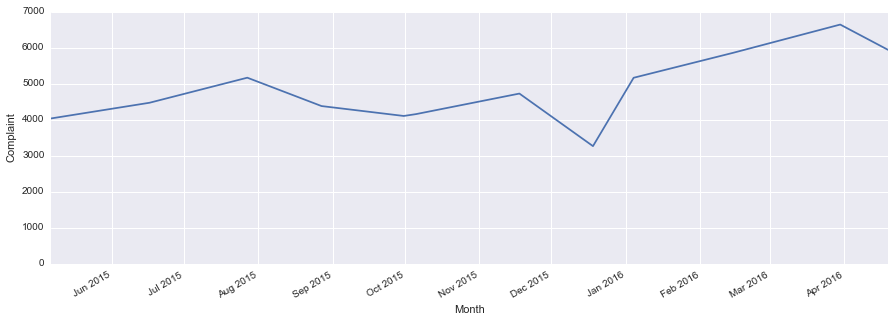

In [49]:
# Plot the number of 311 requests per month

month_counts = three11s.groupby(three11s.CREATED_ON.dt.month)

y = month_counts.size()
x = month_counts.CREATED_ON.first()

axes = pd.Series(y.values, index=x).plot(figsize=(15,5))

plt.ylim(0)
plt.xlabel('Month')
plt.ylabel('Complaint')


# Exploring Request types

In [53]:
grouped_by_type = three11s.groupby(three11s.REQUEST_TYPE)

size = grouped_by_type.size()
size
#len(size)
#size[size > 200]


REQUEST_TYPE
Abandoned Vehicle (parked on street)           1213
Accessibility Construction Issue                  7
Alarm Permit                                      2
Americans with Disabilities                       5
Animal Waste                                    115
Barking Dog                                     131
Barricades                                       95
Basketball Hoop                                  30
Bike Lane Bollard                                23
Bike Trail Maintenance                           37
Billing                                           3
Billing or Shut Off                              35
Board Up (PLI referral to DPW)                  104
Boat/Trailer on Street                           37
Bollard Repair/Maintenance                       27
Brick/block or concrete slab repair             113
Bridge Maintenance                                8
Broken Sidewalk                                 502
Building (Residential)                          139

There are too many request types (268). We need some higher level categories to make this more comprehensible. Fortunately, there is an [Issue and Category codebook](https://data.wprdc.org/dataset/311-data/resource/40ddfbed-f225-4320-b4d2-7f1e09da72a4) that we can use to   

codebook = pd.read_csv('data/codebook.csv')

In [58]:
merged_data = pd.merge(three11s, codebook[['Category', 'Issue']], how='left',
                       left_on="REQUEST_TYPE", right_on="Issue")

In [59]:
merged_data.head()

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,Category,Issue
0,1,3762,2015-05-06 15:16:00,Potholes,Call Center,DPW - Street Maintenance,Lincoln-Lemington-Belmar,9,12,42003120300,2,12,5,Road/Street Issues,Potholes
1,2,3763,2015-05-06 15:21:00,Potholes,Call Center,DPW - Street Maintenance,Carrick,4,32,42003290400,4,32,3,Road/Street Issues,Potholes
2,57402,63038,2016-04-19 08:01:00,Vacant Building,Control Panel,"Permits, Licenses and Inspections",Knoxville,3,30,42003300100,4,30,3,Neighborhood Issues,Vacant Building
3,4,3765,2015-05-06 15:33:00,Public Works Department,Call Center,DPW - Administration,Greenfield,5,15,42003151600,3,15,4,Ask Us/General FAQs,Public Works Department
4,6,3767,2015-05-06 15:38:00,Potholes,Call Center,DPW - Street Maintenance,Squirrel Hill North,8,14,42003140200,3,14,4,Road/Street Issues,Potholes


In [60]:
grouped_by_type = merged_data.groupby(merged_data.Category)

size = grouped_by_type.size()
size

Category
Accessibility                                        248
Animal Issues                                       1447
Ask Us/General FAQs                                  285
Building Maintenance                                4015
Business Issues                                      333
City Facilities and Infrastructure                   721
Communications (Cable, Website)                       25
Construction Issues                                 1408
Garbage and Litter Issues                           8077
Graffiti Issues                                      555
In database, but not on 311 Web Submission Form     3202
Neighborhood Issues                                 2868
Parking                                             2428
Parks Issues                                        2938
Pedestrian/Bicycle Concerns                           91
Permits                                              323
Personnel (City)                                      62
Public Safety         

That is a more manageable list of categories for data visualization. Let's take a look and see 

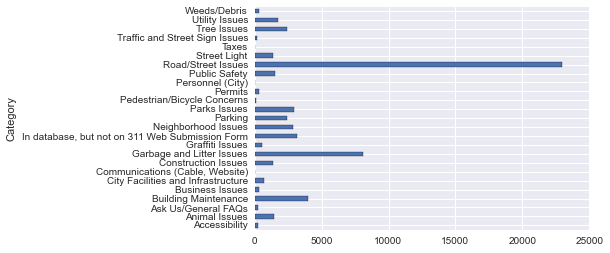

In [8]:
size.plot(kind='barh')

In [66]:
merged_data.groupby(merged_data.NEIGHBORHOOD).size().sort(inplace=False,
                                                         ascending=False)

NEIGHBORHOOD
Brookline                    2835
South Side Slopes            2562
Carrick                      2467
South Side Flats             2322
Squirrel Hill South          2037
Mount Washington             1696
Bloomfield                   1613
Beechview                    1521
Sheraden                     1388
Greenfield                   1387
Central Business District    1373
Central Lawrenceville        1325
Shadyside                    1264
East Liberty                 1134
Highland Park                1121
Hazelwood                    1048
Lincoln-Lemington-Belmar     1046
Squirrel Hill North           996
Stanton Heights               979
Overbrook                     938
Knoxville                     918
Brighton Heights              884
Perry North                   883
Point Breeze                  874
Elliott                       866
Garfield                      838
Homewood North                837
Marshall-Shadeland            832
Central Oakland               827
L

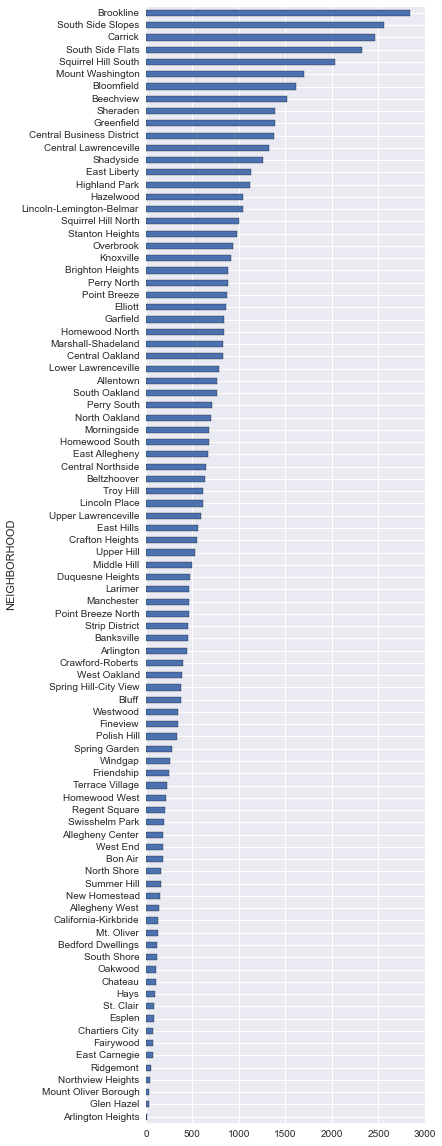

In [64]:
merged_data.groupby(merged_data.NEIGHBORHOOD).size().sort(inplace=False,
                                                         ascending=True).plot(kind="barh", figsize=(5,20))

In [49]:

def issues_by_neighborhood(neighborhood):
    """Generates a plot of issue categories by neighborhood"""
    grouped_by_type = merged_data[merged_data['NEIGHBORHOOD'] == neighborhood].groupby(merged_data.Category)
    size = grouped_by_type.size()
    size.plot(kind='barh')

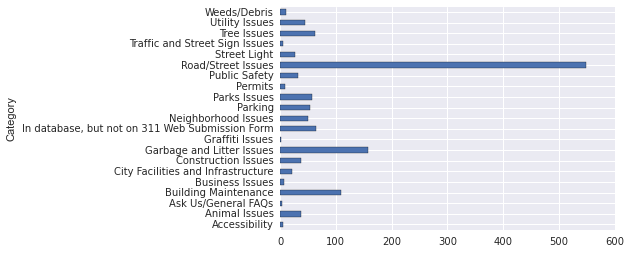

In [50]:
issues_by_neighborhood('Greenfield')

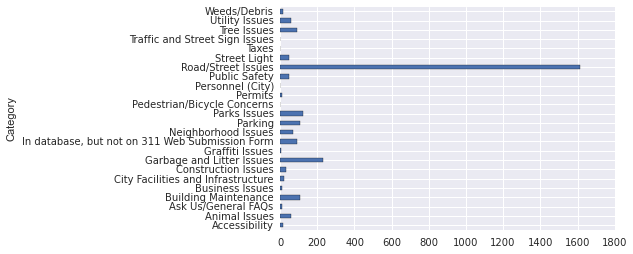

In [51]:
issues_by_neighborhood('Brookline')

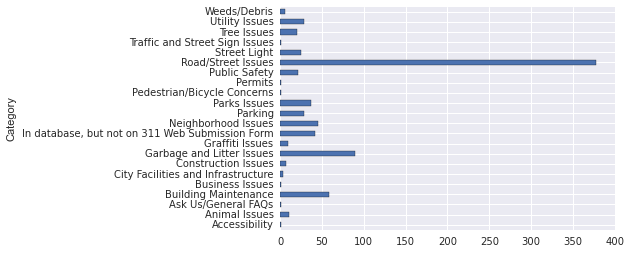

In [52]:
issues_by_neighborhood('Garfield')

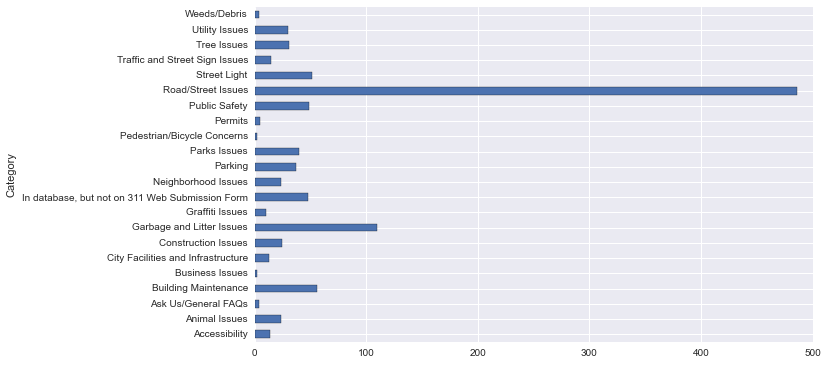

In [45]:
from ipywidgets import interact

@interact(hood=sorted(list(pd.Series(three11s.NEIGHBORHOOD.unique()).dropna())))
def issues_by_neighborhood(hood):
    """Generates a plot of issue categories by neighborhood"""
    grouped_by_type = merged_data[merged_data['NEIGHBORHOOD'] == hood].groupby(merged_data.Category)
    size = grouped_by_type.size()
    size.plot(kind='barh',figsize=(10,6))